# 1. Read and extract data from the file sales_data.csv  Download sales_data.csv. Calculate the Total Cost by multiplying Quantity Ordered and Price each column and save it to the file. Create a bar chart of Year ID versus Total Cost with appropriate labels, titles, and axis. (3 Points)

In [2]:
import pandas as pd
df_sales = pd.read_csv('sales_data_sample.csv')
df_sales.describe()

,Unnamed: 0,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,MONTH_ID,YEAR_ID,Total Cost
count,2823.00000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,1411.00000,10258.725115,35.092809,83.658544,3553.889072,7.092455,2003.81509,2936.906408
std,815.07423,92.085478,9.741443,20.174277,1841.865106,3.656633,0.69967,1105.644284
min,0.00000,10100.000000,6.000000,26.880000,482.130000,1.000000,2003.00000,482.130000
25%,705.50000,10180.000000,27.000000,68.860000,2203.430000,4.000000,2003.00000,2100.000000
50%,1411.00000,10262.000000,35.000000,95.700000,3184.800000,8.000000,2004.00000,2800.000000
75%,2116.50000,10333.500000,43.000000,100.000000,4508.000000,11.000000,2004.00000,3726.810000
max,2822.00000,10425.000000,97.000000,100.000000,14082.800000,12.000000,2005.00000,9048.160000


In [28]:
df_sales['Total Cost'] = df_sales.QUANTITYORDERED * df_sales.PRICEEACH
df_sales.describe()

,Unnamed: 0,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,MONTH_ID,YEAR_ID,Total Cost
count,2823.00000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,1411.00000,10258.725115,35.092809,83.658544,3553.889072,7.092455,2003.81509,2936.906408
std,815.07423,92.085478,9.741443,20.174277,1841.865106,3.656633,0.69967,1105.644284
min,0.00000,10100.000000,6.000000,26.880000,482.130000,1.000000,2003.00000,482.130000
25%,705.50000,10180.000000,27.000000,68.860000,2203.430000,4.000000,2003.00000,2100.000000
50%,1411.00000,10262.000000,35.000000,95.700000,3184.800000,8.000000,2004.00000,2800.000000
75%,2116.50000,10333.500000,43.000000,100.000000,4508.000000,11.000000,2004.00000,3726.810000
max,2822.00000,10425.000000,97.000000,100.000000,14082.800000,12.000000,2005.00000,9048.160000


In [10]:
df_sales.to_csv('sales_data_sample.csv', encoding='utf-8') 


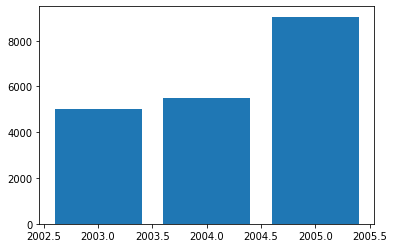

In [103]:
import matplotlib.pyplot as plt
x = df_sales['YEAR_ID']
y = df_sales['Total Cost']
plt.bar(x,y)
plt.show()


# 2. Read and extract the Price each and the Total Cost from the previous file, by using least-squares polynomial fit, create models that range from polynomial degrees of 1 to 3. i.e. create 3 models. Without plotting the models, identify which one is the best model and print the statistic used to identify the best fit model. (6 points)



In [16]:
import numpy as np
import pandas as pd
def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError= error/len(observed)
    return 1 - (meanError/np.var(observed))

def genFits(xVals, yVals, degrees): 
    models = []
    for d in degrees:
        model = np.polyfit(xVals,yVals, d)
        models.append(model)
    return models

def testFits(models, degrees, xVals,yVals, title):
    for i in range(len(models)):
        estYVals= np.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        
        print (f'R-squared error for {i+1} model:',error)

print ('Statistic used to identify the best fit model is: R-squared ')

xVals, yVals = df_sales['PRICEEACH'], df_sales['Total Cost']
models = genFits(xVals, yVals,[1,2,3])
testFits(models,[1,2,3],xVals,yVals, 'Comapring different degree polynomials' )

print('Model 3 with R-squared value of 0.4143690811486085 is the best model')

Statistic used to identify the best fit model is: R-squared 
R-squared error for 1 model: 0.4143602213380768
R-squared error for 2 model: 0.4143605185326895
R-squared error for 3 model: 0.4143690811486085
Model 3 with R-squared value of 0.4143690811486085 is the best model


# 3. Write a Python program to generate 10 data between 10 to 30 that uses the sum of random variables that is a normal distribution and a 3rd-degree polynomial equation (4x3+2x2+5x+8). Using least-squares polynomial fit, curve the generated data using a model until your model can accurately predict all values (6 points)



In [97]:
from scipy import stats
import numpy as np
mean = 0
stdv = 1
x = np.random.randint(10,31,10)
print(x)
y = stats.norm.rvs(x,)
y.sort()
print(y)
z = 4*y**3 + 2*y**2 + 5*y + 8
z.sort()
print(z)
# y = stats.truncnorm.rvs(10,31,size=10)
# y

[27 25 26 20 14 14 18 13 23 29]
[15.6166842  15.84691809 16.07152368 18.42657644 20.0575845  23.36931398
 24.36661035 26.36227029 26.47049316 28.41844167]
[15808.28440057 16507.70157023 17209.64977954 25805.35498638
 33190.10349456 52267.34729122 59186.21236722 74813.62355281
 75731.84910031 93569.13160072]


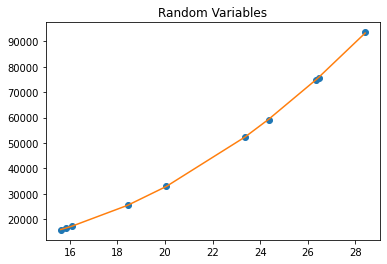

In [101]:
xVals, yVals = y,z
plt.plot(xVals, yVals, 'o', label = 'Data Points')
plt.title('Random Variables')
model1 = np.polyfit(xVals, yVals, 2) 
plt.plot(xVals, np.polyval(model1, xVals), label = 'Quadratic Model')

# 4.Write a Python program to plot the t-distribution of the total cost of sales data (updated file of question 1) and overlay the plot with the t-distribution of a sample of 100 randomly selected sales. Both the t-distribution should be in the same chart, overlapping each other, but with different colors (5 points)  



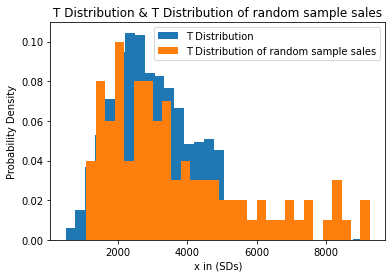

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

numBins = 30
tDist = df_sales['Total Cost']
sample = df_sales.sample(100)
tDistsample = sample['SALES']

plt.hist(tDist, bins=numBins, weights=np.array(len(tDist)*[1.0])/len(tDist), label='T Distribution')
plt.hist(tDistsample, bins=numBins, weights=np.array(len(tDistsample)*[1.0])/len(tDistsample), label='T Distribution of random sample sales')
plt.title('T Distribution & T Distribution of random sample sales')
plt.xlabel('x in (SDs)')
plt.ylabel('Probability Density')
plt.legend()